# Prognose Herzkrankheit

In diesem Kursprojekt werden verschiedene Modelle aus klassischer Statistik und Machine Learning verwendet, um das Auftreten Herzkrankheit (Verengung der Herzkranzgefäße) vorherzusagen. Als Prädiktoren wurden verschiedene demographische Variablen und Parameter des Gesundheitszustandes verwendet. Zunächst wurde der Datensatz eingelesen und vorverarbeitet. Darauf folgte die Erstellung verschiedener Vorhersagemodelle: 1. Logistische Regression, 2. Support Vector Machines, 3. Decision Tree, 4. Random Forest. Abschließend wurde die Modellgüte der verschiedenen Ansätze verglichen. Eine Übersicht über die verwendeten Schritte findet sich unten.
Der verwendete Datensatz stammt aus dem UCI Machine Learning Repository und wurde von David W. Aha aufbereitet und zur Verfügung gestellt. Er befindet auch an verschiedenen Stellen auf Kaggle, worüber er für dieses Projekt bezogen wurde ([Kaggle Datensatz](https://https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)). Der [ursprüngliche Datensatz ](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)enthielt 75 Variablen (erstellt 1988). Darauf basierend wurde ein Datensatz mit 14 Variablen extrahiert, der bereits Grundlage verschiedener Veröffentlichungen und Machine Learning Ansätze war und auch für dieses Projekt verwendet wurde.

## Vorgehen/Inhalt:
* [Vorbereitungen](#Kap0)
* [Explorative Datenanalyse](#Kap1)
* [Logistische Regression](#Kap2)
* [Decision Tre](#Kap3)
* [Random Forest](#Kap4)
* [Support Vector Machines](#Kap5)
* [Modellgüte](#Kap6)

## Vorbereitungen <a class="anchor" id="Kap0"></a>

In [1]:
#Import benötigter Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

Der nächste Schritt ist der import des Datasets.


In [4]:
df = pd.read_csv("/content/heart.csv") 
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

### Beschreibung der Daten <a class="anchor" id="Kap1"></a>

Insgesamt liegen 14 Variablen und 303 Fälle im Datensatz vor. Die Variablen sind die folgenden:

   output (Herzkrankheit) - 0 = Herzkrankheit (definiert als Verengung von >50% in einem der Herzkranzgefäße), 1 = keine Herzkrankheit.
    
   Soziodemographische Variablen:

   *  age - Alter in Jahren; kontinuierliche Variable;

   *  sex - Geschlecht; binäre Variable (1 = männlich; 0 = weiblich)

    
   Klinische Parameter, Testergebnisse, Symptome:
    
   * cp - Brustschmerzen (Angina Pectoris); kategoriale Variable (0 = asymptomatisch, 1 = atypische Angina, 2 = nicht kardiale thorakale Beschwerden (?), 3 = typische Angina).  

   * trtbps - Ruheblutdruck (in mm Hg) bei Einlieferung ins Krankenhaus; kontinuierliche Variable.

   * chol - Serum Cholesterin (in mg/dl); kontinuierliche Variable.

   * fbs - Blutzucker > 120 mg/dl; binäre Variable (0 = nein, 1 = ja)

   * restecg - Ruhe-EKG-Ergebnisse; categorical (0 = normal; 1 = ST-T Veränderungen; 2 = Hypertrophie)

   * thalachh - maximal erreichte Herzschlagfrequenz; kontinuierliche Variable.

   * exng - Angina Pectoris unter Belastung; binäre Variable (0 = nein, 1 = ja).

   * oldpeak - ST-Strecken-Senkung (unter Belastung relativ zum Ruhezustand); kontinuierliche Variable.

   * slp - Übergang von S zu ST-Welle (the slope of the peak exercise ST segment); kategoriale Variable (0 = upsloping, 1 = flat, 2 = downsloping)

   * caa - Fluoroskopie: Anzahl der eingefärbten Gefäße (number of major vessels (0-3) colored by fluoroscopy); kategoriale Variable (4 = missing value)

   * thall- Myokardszintigraphie (thallium stress); kategoriale Variable (1 = fixed defect, 2 = normal, 3 = reversable defect, 0 = Missing value)
   
    
   Durch Dummy-Kodierung kommen noch die folgenden Variablen hinzu:
   *  cp_1 = 1 = atypische Angina
   *  cp_2 = 1 = nicht kardiale thorakale Beschwerden
   *  cp_3 = 1= typische Angina
   *  Refernz cp = normal
          
   *  restecg_1 = 1 = ST-T Veränderungen
   *  restecg_2 = 1 = Hypertrophie
   *  Referenz restecg = normal
    
   *  slp_1 = 1 = flat
   *  slp_2 = 1 = downsloping
   *  Referenz slp = upsloping
    
   *  thall_2 = 1 = normal
   *  thall_3 = 1 = reversable defect
   *  Referenz thall = fixed defect   
    


### Doppelten Fall entfernen
Beim Durchsehen des Datensatzes ist aufgefallen, dass ein Fall doppelt vor kam. Dieser wird entfernt:

In [5]:
df.drop_duplicates(inplace = True)

### Missing values umkodieren
In dem Kaggle Datensatz wurden bei zwei Variablen (caa, thall) fehlende Werte durch Zahlen ersetzt. Dies muss rückgängig gemacht werden, um falsche Schätzungen zu vermeiden:

In [6]:
df["caa"].replace(4,np.nan, inplace=True)
df["thall"].replace(0, np.nan, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       298 non-null    float64
 12  thall     300 non-null    float64
 13  output    302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 35.4 KB


In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,298.000000,300.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.674497,2.330000,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,0.938202,0.585014,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


### Training- und Testset erstellen

Wir teilen das Datenset in ein Training- und Testset auf, um die Modelle aufstellen und testen zu können. Das Verhältnis von Training- und Testset beträgt 80/20.

In [8]:
from sklearn.model_selection import train_test_split
heart_train, heart_test = train_test_split(df, test_size = 0.2, random_state = 15)

### Imputieren
Nachdem Trainings- und Testsets gebildet wurden, können die fehlenden Werte imputiert werden. Imputiert wird mittels Median, da die zu imputierenden Variablen dummy und ganzzahlige Variablen sind. Da Imputieren nicht zwingend zu besseren Ergebnissen führt, werden die Modelle später einmal mit dem Datensatz mit fehlenden Werten und einmal mit dem Datensatz, in dem die fehlenden Werte imputiert wurden, trainiert.

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(heart_train)
#Fehlende Werte bei Trainingsdaten imputieren
heart_train_imp = imputer.transform(heart_train)
heart_train_imp = pd.DataFrame(heart_train_imp, columns = heart_train.columns)
#Fehlende Werte bei Testdaten imputieren
heart_test_imp = imputer.transform(heart_test)
heart_test_imp = pd.DataFrame(heart_test_imp, columns = heart_test.columns)

In [10]:
heart_train_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       241 non-null    float64
 1   sex       241 non-null    float64
 2   cp        241 non-null    float64
 3   trtbps    241 non-null    float64
 4   chol      241 non-null    float64
 5   fbs       241 non-null    float64
 6   restecg   241 non-null    float64
 7   thalachh  241 non-null    float64
 8   exng      241 non-null    float64
 9   oldpeak   241 non-null    float64
 10  slp       241 non-null    float64
 11  caa       241 non-null    float64
 12  thall     241 non-null    float64
 13  output    241 non-null    float64
dtypes: float64(14)
memory usage: 26.5 KB


### Dummy Variablen erstellen

Für die (kategorialen) Faktor-Variablen (cp, slp, restecg, thall) werden Dummy Variablen erstellt. Dabei werden nicht k-1 Variablen erstellt, d.h. das erste Faktor Level wird nicht gedropt.

In [11]:
#Fehlende Werte entfernen
heart_train = heart_train.dropna()
heart_test = heart_test.dropna()

In [12]:
def dummies(dataframe, columns):
    dummy_df = pd.get_dummies(data = dataframe, columns = columns, dtype = np.float64)
    return dummy_df

In [13]:
dummy_vars = ['cp','slp','restecg','thall']
#Dummy Variablen für Datensatz mit fehlenden Werten
heart_train = dummies(heart_train,dummy_vars)
heart_test = dummies(heart_test,dummy_vars)
#Dummy Variablen für Datensatz mit imputierten Werten
heart_train_imp = dummies(heart_train_imp, dummy_vars)
heart_test_imp = dummies(heart_test_imp, dummy_vars)

In [14]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 226 to 246
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        238 non-null    int64  
 1   sex        238 non-null    int64  
 2   trtbps     238 non-null    int64  
 3   chol       238 non-null    int64  
 4   fbs        238 non-null    int64  
 5   thalachh   238 non-null    int64  
 6   exng       238 non-null    int64  
 7   oldpeak    238 non-null    float64
 8   caa        238 non-null    float64
 9   output     238 non-null    int64  
 10  cp_0       238 non-null    float64
 11  cp_1       238 non-null    float64
 12  cp_2       238 non-null    float64
 13  cp_3       238 non-null    float64
 14  slp_0      238 non-null    float64
 15  slp_1      238 non-null    float64
 16  slp_2      238 non-null    float64
 17  restecg_0  238 non-null    float64
 18  restecg_1  238 non-null    float64
 19  restecg_2  238 non-null    float64
 20  thall_1.

In [15]:
heart_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 75 to 295
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        58 non-null     int64  
 1   sex        58 non-null     int64  
 2   trtbps     58 non-null     int64  
 3   chol       58 non-null     int64  
 4   fbs        58 non-null     int64  
 5   thalachh   58 non-null     int64  
 6   exng       58 non-null     int64  
 7   oldpeak    58 non-null     float64
 8   caa        58 non-null     float64
 9   output     58 non-null     int64  
 10  cp_0       58 non-null     float64
 11  cp_1       58 non-null     float64
 12  cp_2       58 non-null     float64
 13  cp_3       58 non-null     float64
 14  slp_0      58 non-null     float64
 15  slp_1      58 non-null     float64
 16  slp_2      58 non-null     float64
 17  restecg_0  58 non-null     float64
 18  restecg_1  58 non-null     float64
 19  restecg_2  58 non-null     float64
 20  thall_1.0 

Damit sind alle notwendigen Vorbereitungen getroffen und es kann mit der Datenanalyse begonnen werden.

## Explorative Datenanalyse <a class="anchor" id="Kap1"></a>


* Deskriptive Statistik
* Graphische Darstellung
* Korrelation darstellen
* Daten transformieren/Feature scaling (Standardisieren)

In [16]:
# Deskriptive Statistik für alle Variablen im Datensatz
heart_train.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,...,cp_3,slp_0,slp_1,slp_2,restecg_0,restecg_1,restecg_2,thall_1.0,thall_2.0,thall_3.0
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,...,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,54.428571,0.659664,132.008403,248.000000,0.147059,149.394958,0.344538,1.096639,0.693277,0.529412,...,0.075630,0.084034,0.478992,0.436975,0.500000,0.487395,0.012605,0.054622,0.563025,0.382353
std,9.018566,0.474821,17.805795,53.197824,0.354911,23.542123,0.476219,1.191385,0.942681,0.500186,...,0.264963,0.278023,0.500611,0.497057,0.501054,0.500894,0.111797,0.227720,0.497057,0.486986
min,29.000000,0.000000,100.000000,131.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.250000,0.000000,132.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,241.500000,0.000000,152.500000,0.000000,0.800000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,140.000000,277.500000,0.000000,166.000000,1.000000,1.750000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Graphische Darstellung

<AxesSubplot:xlabel='age', ylabel='Count'>

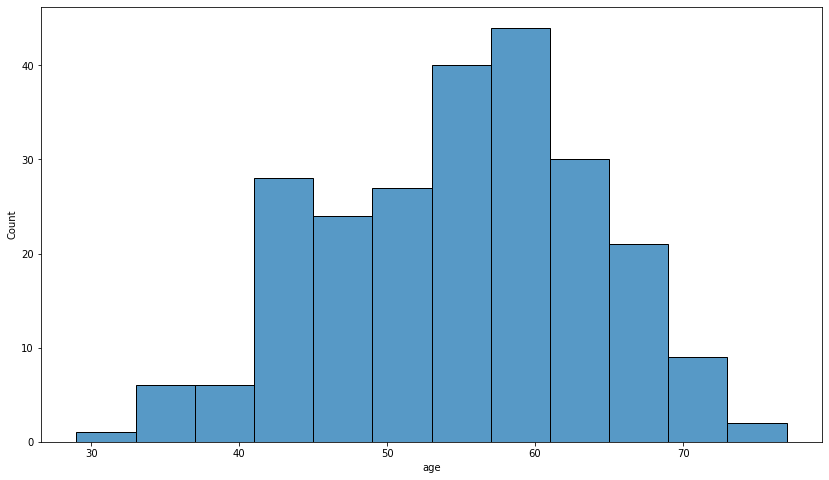

In [17]:
#Histogram mit Seaborn
import seaborn as sns
plt.figure(figsize=(14,8))
sns.histplot(heart_train['age'], kde=False)

Das Alter ist näherungsweise normalverteilt zwischen Min = 29 und Max = 77 Jahren.

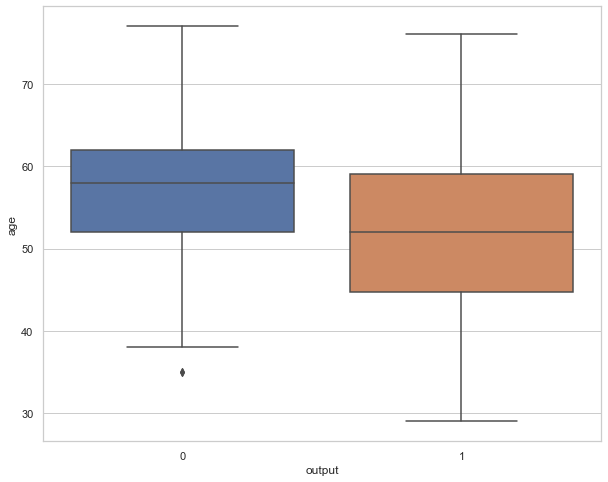

In [18]:
#Alter und Herzkrankheit
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='output',y='age', data=df, orient="v")

Mit höhrerem Alter ist Herzerkrankung häufiger (output = 0).

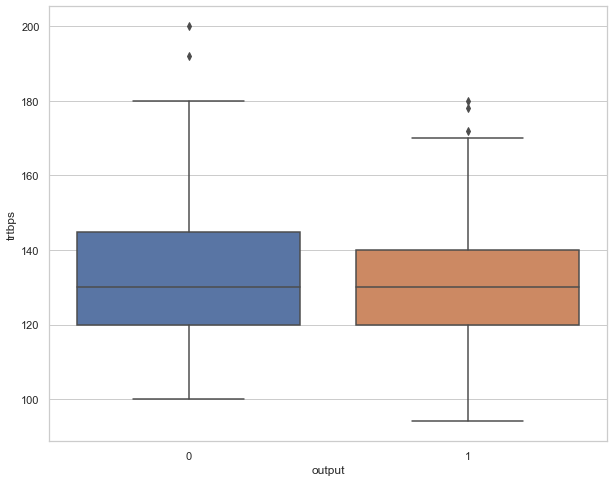

In [19]:
#Blutdruck und Herzkrankheit
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='output',y='trtbps', data=df, orient="v")

Erhöhter Blutdruck ist ein bedeutender Risikofaktor für Herzkranheit. Im Datensatz haben Fälle mit Herzkrankheit (output = 0) allerdings einen nur minimal höheren Blutdruck. Könnte auf medikamentöse Behandlung eines erhöhten Blutdrucks hindeuten. Wäre dies der Fall, müssten die Ergebnisse vor diesem Hintergrund betrachtet werden, da im Datensatz keine Variable existiert, welche dies erfasst. Auffällig sind aber die unterschiedlichen Spannweiten bei beiden Grupppen.

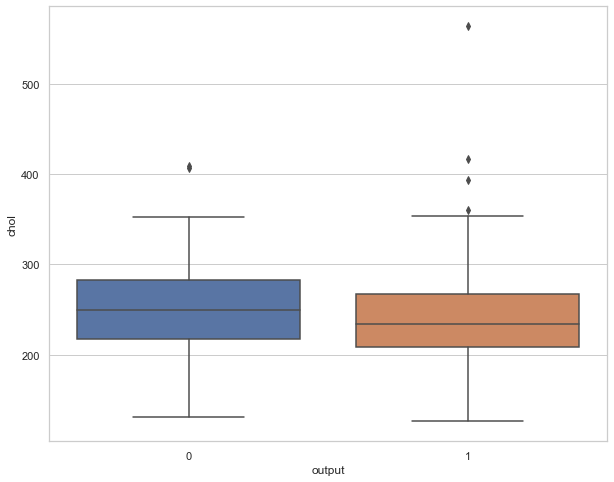

In [20]:
#Cholesterinspiegel und Herzkrankheit
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='output',y='chol', data=df, orient="v")

Ein erhöhter Cholesterinspiegel ist ebenfalls ein Risikofaktor. Im Unterschied zu Blutdruck sind hier deutliche Unterschiede zwischen den Gruppen erkennbar.

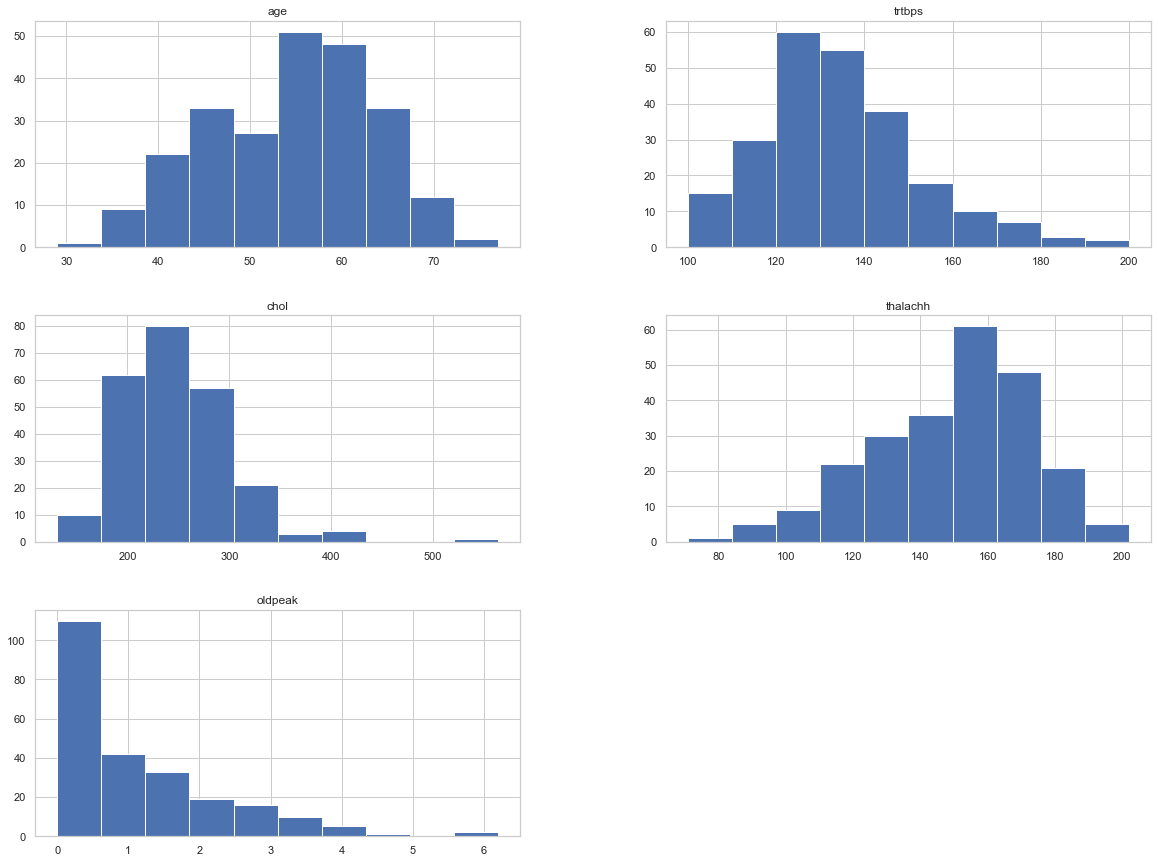

In [21]:
continuous_colums = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
heart_train[continuous_colums].hist(bins = 10, figsize=(20,15))
plt.show()

Die Häufigkeitsverteilungen der kontinuierlichen Variablen sind, mit Ausnahme der Variable Alter, alle rechts- bzw. linksschief.

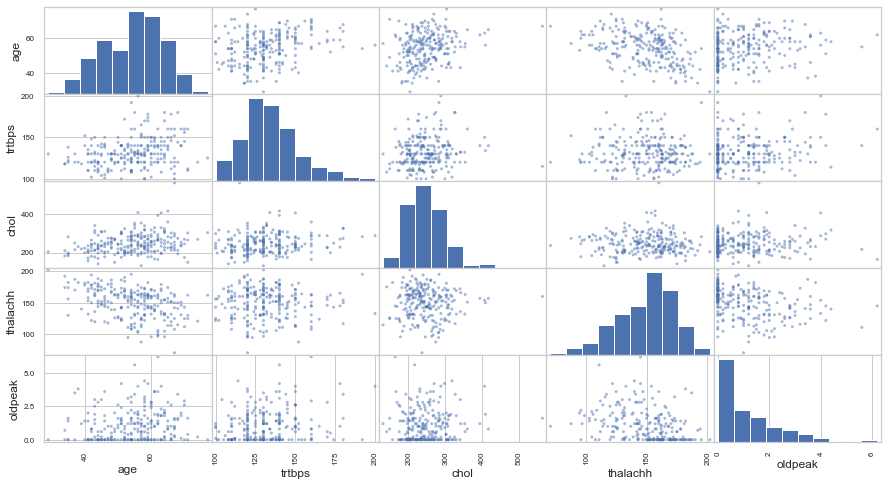

In [22]:
#Korrelationen
from pandas.plotting import scatter_matrix
ax = scatter_matrix(heart_train[continuous_colums], figsize = (15,8))

Wie zu erwarten deuten die Scatterplots positive Korrelationen zwischen den drei Risikofaktoren Alter, Blutdruck und Cholesterinspiegel an.

### Daten transformieren/Feature scaling (Standardisieren)
Bevor mit der Schätzung der Modelle begonnen wird, werden die kontinuierlichen Variablen noch standardisiert, sodass sie einen Mittelwert von 0 und eine Standardabweichung von 1 haben. Dadurch können bessere Schätzergebnisse erzielt werden.

In [23]:
from sklearn.preprocessing import StandardScaler

continuous_colums = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

scaler = StandardScaler().fit(heart_train[continuous_colums])
scaler_imp = StandardScaler().fit(heart_train_imp[continuous_colums])

def scale_data(data, columns, scaler):
    for col in columns:
        data[col] = scaler.fit_transform(data)
    return data

In [24]:
#Anwendung der Standardisierungsfunktion auf die verschiedenen Datensätze
heart_train_stand = scale_data(heart_train,continuous_colums,scaler)
heart_test_stand = scale_data(heart_test,continuous_colums,scaler)
heart_train_imp_stand = scale_data(heart_train_imp,continuous_colums,scaler_imp)
heart_test_imp_stand = scale_data(heart_test_imp,continuous_colums,scaler_imp)

In [80]:
heart_train_stand.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,...,cp_3,slp_0,slp_1,slp_2,restecg_0,restecg_1,restecg_2,thall_1.0,thall_2.0,thall_3.0
count,2.380000e+02,238.000000,2.380000e+02,2.380000e+02,238.000000,2.380000e+02,238.000000,2.380000e+02,238.000000,238.000000,...,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,-1.767960e-16,0.659664,3.685194e-17,3.685194e-17,0.147059,3.685194e-17,0.344538,3.685194e-17,0.693277,0.529412,...,0.075630,0.084034,0.478992,0.436975,0.500000,0.487395,0.012605,0.054622,0.563025,0.382353
std,1.002107e+00,0.474821,1.002107e+00,1.002107e+00,0.354911,1.002107e+00,0.476219,1.002107e+00,0.942681,0.500186,...,0.264963,0.278023,0.500611,0.497057,0.501054,0.500894,0.111797,0.227720,0.497057,0.486986
min,-2.825522e+00,0.000000,-2.825522e+00,-2.825522e+00,0.000000,-2.825522e+00,0.000000,-2.825522e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.143175e-01,0.000000,-7.143175e-01,-7.143175e-01,0.000000,-7.143175e-01,0.000000,-7.143175e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.349489e-02,1.000000,6.349489e-02,6.349489e-02,0.000000,6.349489e-02,0.000000,6.349489e-02,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.301912e-01,1.000000,7.301912e-01,7.301912e-01,0.000000,7.301912e-01,1.000000,7.301912e-01,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2.508048e+00,1.000000,2.508048e+00,2.508048e+00,1.000000,2.508048e+00,1.000000,2.508048e+00,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Logistische Regression<a class="anchor" id="Kap2"></a>

### Vorgehen:
+ Kriterium und Prädiktoren definieren
+ Modell aufstellen und schätzen
+ Modell testen

### Kriterum und Prädiktoren definieren

In [25]:
X_train = heart_train_stand.drop(columns = ["cp_0", "slp_0", "restecg_0", "thall_1.0", "output"])
y_train = heart_train_stand["output"]

X_test = heart_test_stand.drop(columns = ["cp_0", "slp_0", "restecg_0", "thall_1.0", "output"])
y_test = heart_test_stand["output"]

In [26]:
X_train2 = heart_train_imp_stand.drop(columns = ["cp_0.0", "slp_0.0", "restecg_0.0", "thall_1.0", "output"])
y_train2 = heart_train_imp_stand["output"]

X_test2 = heart_test_imp_stand.drop(columns = ["cp_0.0", "slp_0.0", "restecg_0.0", "thall_1.0", "output"])
y_test2 = heart_test_imp_stand["output"]

### Modell aufstellen

In [27]:
from sklearn.linear_model import LogisticRegression
   
# create the model object
model_lr = LogisticRegression()
model_lr
    
# fit the model to the training data
model_lr.fit(X_train, y_train, sample_weight=None)

LogisticRegression()

Modell Prediction für späteren Vergleich der Modelle speichern

In [28]:
y_fit_lr = model_lr.predict(X_test)

In [29]:
#Selbes Vorgehen für den Datensatz mit imputierten Werten
model_lr.fit(X_train2, y_train2, sample_weight=None)
y_fit_lr2 = model_lr.predict(X_test2)

### Modell testen

Accuracy bestimmen.

In [30]:
model_lr.score(X_test, y_test) #Daten mit fehlenden Werten

0.7413793103448276

In [32]:
model_lr.score(X_test2, y_test2) #Daten mit imputierten Werten

0.7377049180327869

ROC Kurve erstellen

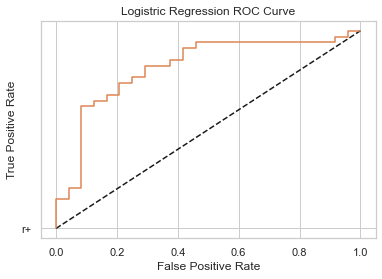

In [33]:
from sklearn.metrics import roc_curve

# calculating the probabilities
y_pred_prob = model_lr.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

Einfluss der einzelnen Prädiktoren inspizieren

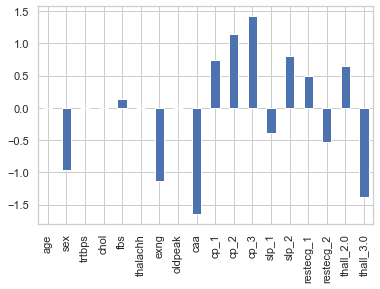

In [34]:
coeffs = pd.DataFrame(data = model_lr.coef_, columns = X_train.columns)
coeffs.T.plot.bar(legend=None);

Auffällig ist, dass Angina Pectoris (cp_1, cp_3) ein positives Vorzeichen (hier gleichbedeutend mit einer Risikoverringerung) hat.

## Decision Tree<a class="anchor" id="Kap3"></a>

### Vorgehen:
+ Modell aufstellen
+ Ergebnisse darstellen

### Modell aufstellen

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=10)   #max_depth=3, 
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

Modell Prediction für späteren Vergleich der Modelle speichern

In [36]:
y_fit_dt = dt.predict(X_test)

In [39]:
dt.score(X_test, y_test) # Accuracy für Datensatz mit fehlenden Werten

0.7068965517241379

In [38]:
#Decision Tree für Datensatz mit imputierten Werten:
dt.fit(X_train2,y_train2)
y_fit_dt2 = dt.predict(X_test2)

In [40]:
dt.score(X_test2,y_test2) #Accuracy für Datensatz mit imputierten Werten

0.6885245901639344

### Grafische Darstellung der Ergebnisse

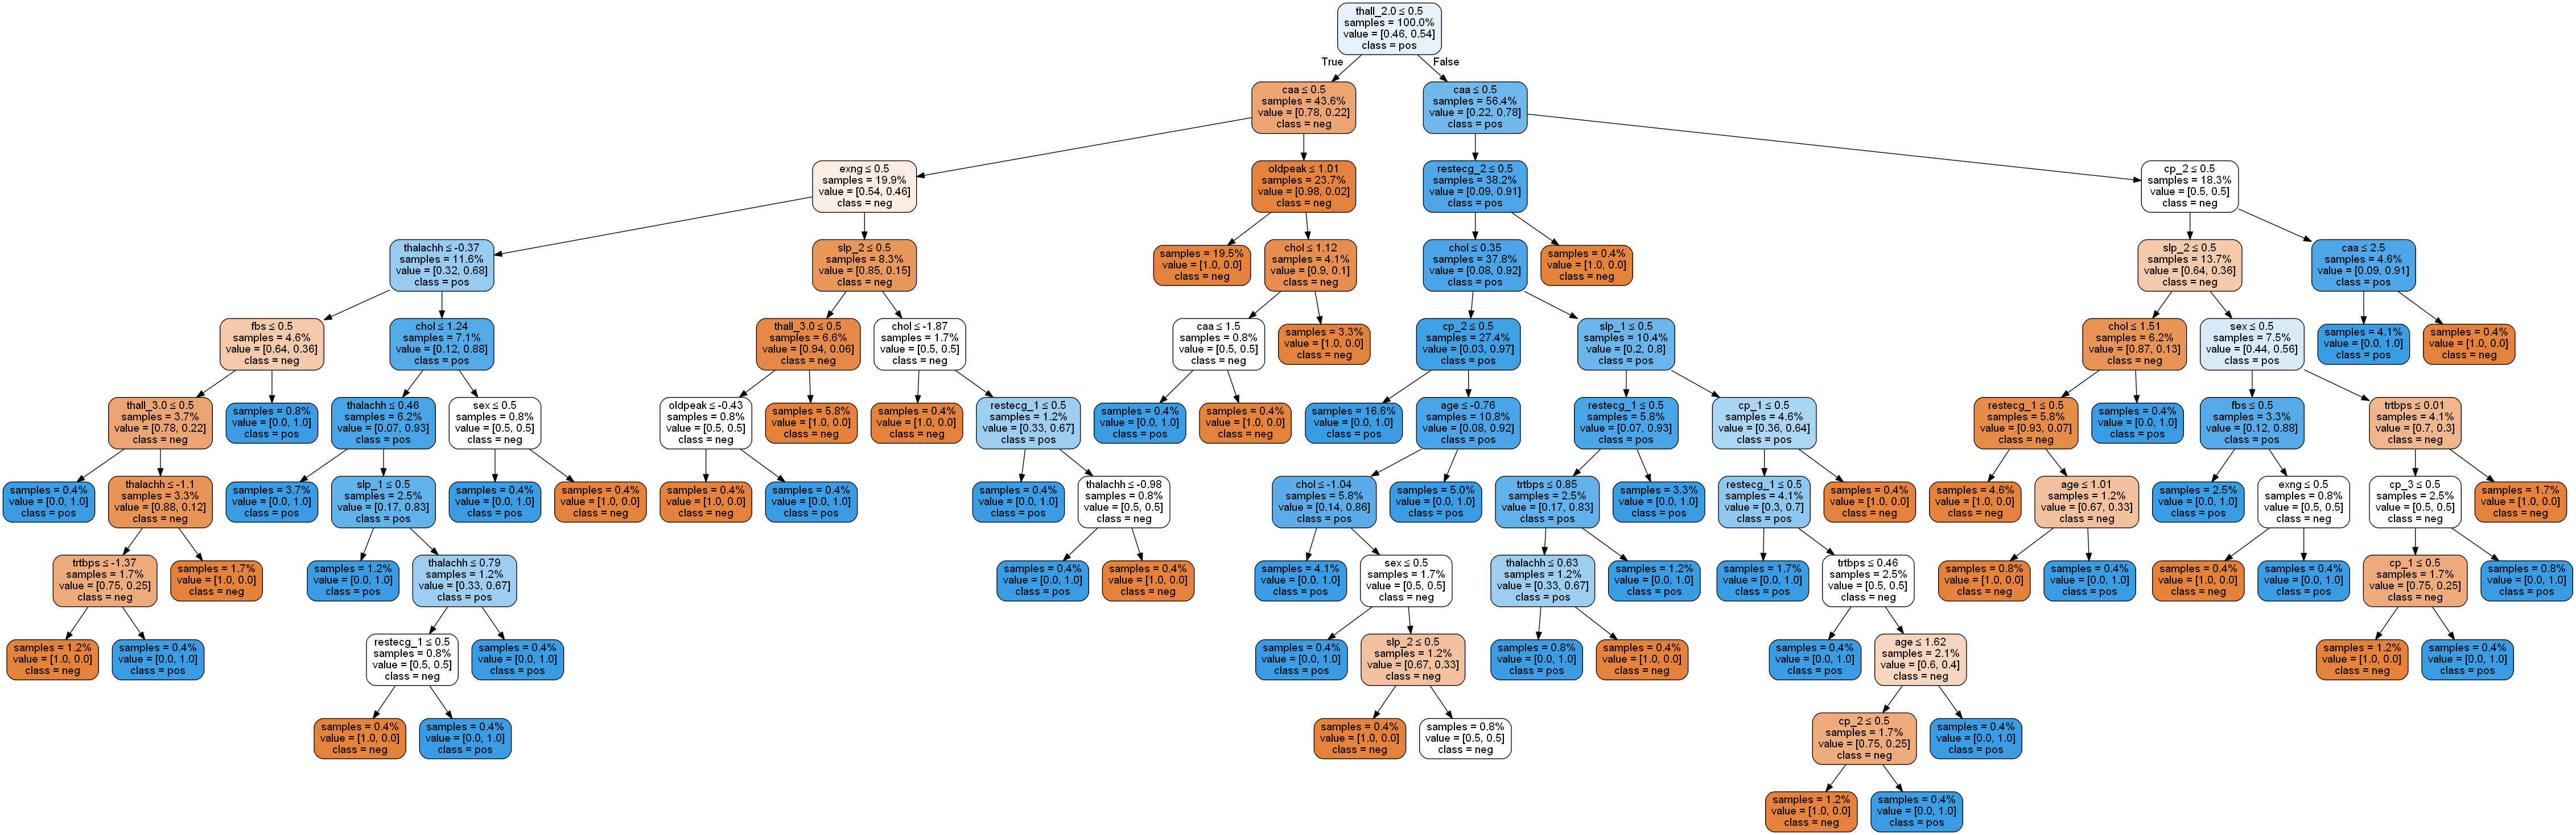

In [43]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 

dot_data = StringIO()
export_graphviz(dt, feature_names=X_train.columns, out_file=dot_data,  
                filled=True, rounded=True, proportion=True, special_characters=True,
                impurity=False, class_names=['neg', 'pos'], precision=2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [133]:
from sklearn.metrics import confusion_matrix
predictions = dt.predict(X_test)
cm = confusion_matrix(y_test,predictions)
print(cm)

[[18  6]
 [11 23]]


## Random Forest<a class="anchor" id="Kap4"></a>

### Vorgehen:
+ Hyperparameteroptimierung mittels Grid Search
+ Modell schätzen
+ Ergebnisse darstellen

In [46]:
#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'bootstrap': [True],
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4,5,10],
    'min_samples_split': [1,2,3,4,5,10],
    'n_estimators': [10, 20,30,40, 50, 100,1000]
}
#Base model
rf = RandomForestClassifier(random_state = 42)
#Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           n_jobs = -1, verbose = 2)

In [47]:
# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 2520 candidates, totalling 12600 fits


One or more of the test scores are non-finite: [       nan        nan        nan ... 0.81906028 0.82322695 0.81489362]


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10],
                         'min_samples_split': [1, 2, 3, 4, 5, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 100, 1000]},
             verbose=2)

In [2]:
#Prüfen, welche Hyperparameterkombination(en) die Warnmeldung ausgelöst haben und ob die grid search deshalb geändert werden sollte.
#grid_search_rf.cv_results_

Die Warnmeldung kann ignoriert werden. Für genau eine der 16380 Hyperparameterkombinationen (max_depth': 4,
   'min_samples_leaf': 10,   'min_samples_split': 5,   'n_estimators': 100) konnte kein Wert berechnet werden.

In [48]:
#best parameters
grid_search_rf.best_params_

{'bootstrap': True,
 'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 20}

In [49]:
#Bestes Modell auf Testdaten anwenden
model_rf1 = grid_search_rf.best_estimator_
y_fit_rf1 = model_rf1.predict(X_test)

In [204]:
#Random Forest für Datensatz mit imputierten Werten
grid_search_rf2 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [205]:
grid_search_rf2.fit(X_train2,y_train2)

Fitting 5 folds for each of 2520 candidates, totalling 12600 fits


One or more of the test scores are non-finite: [       nan        nan        nan ... 0.81743197 0.81743197 0.81326531]


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10],
                         'min_samples_split': [1, 2, 3, 4, 5, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 100, 1000]},
             verbose=2)

In [1]:
#Prüfen, welche Hyperparameterkombination(en) die Warnmeldung ausgelöst haben und ob die grid search deshalb geändert werden sollte.
#grid_search_rf2.cv_results_

Wie beim ersten Modell bereitet nur eine Kombination von Hyperparametern Probleme.

In [207]:
#best parameters
grid_search_rf2.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 10}

In [208]:
#Bestes Modell auf Testdaten anwenden
model_rf2 = grid_search_rf2.best_estimator_
y_fit_rf2 = model_rf2.predict(X_test2)

Shapley Values:

In [50]:
#Shap for graphical illustration of results
import shap
explainer = shap.TreeExplainer(model_rf1)
shap_values = shap.TreeExplainer(model_rf1).shap_values(X_test)

In [51]:
#Fall auswählen
choosen_instance = X_test.loc[[21]]

#Shapley values für ausgewählten Fall berechnen
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

Mit Shapley values kann der Einfluss einzelner Variablen auf den Output des Modells bestimmt werden. Hilfreich, da viele Modelle aus dem machine learning Bereich nur schwer zu interpretieren sind. Hier ist für einen ausgewählten Patienten dargestellt, wie die Modellvariablen den Output des Modells (f(x) = 0.80) erklären. Blau gefärbte Variablen verkleinern den Outputwert (da 0 = KHK erhöhen sie also das Risiko für KHK bei diesem Patienten). Im dargestellten Fall haben das Auftreten von Schmerzen im Brustbereich nach Belastung sowie männliches Geschlecht den größten Einfluss. Rot gefärbte Variablen erhöhen den Outputwert und wirken sich negativ auf das Risiko aus.

## Support Vector Machines<a class="anchor" id="Kap5"></a>

### Vorgehen:
+ Hyperparameteroptimierung mittels Grid Search
+ Modell schätzen
+ Ergebnisse darstellen

In [222]:
#Grid Search Modell mit fehlenden Werten
from sklearn import svm

model_svm = svm.SVC()
param_grid = [
  {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1, 0.001, 0.0001, 0.00001, 1/len(X_train)], 'kernel': ['rbf']},
 ]

grid_search = GridSearchCV(model_svm, param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.001, 0.0001, 1e-05,
                                    0.004201680672268907],
                          'kernel': ['rbf']}])

In [121]:
print(grid_search.best_params_)

{'C': 100, 'gamma': 0.004201680672268907, 'kernel': 'rbf'}


In [122]:
#Bestes Modell auf Testdaten anwenden und fitted values speichern
model_svm1 = grid_search.best_estimator_
y_fit_svm1 = model_svm1.predict(X_test)

Dasselbe noch einmal für das Modell mit imputierten Werten:

In [223]:
#Grid Search
grid_search2 = GridSearchCV(model_svm, param_grid)
grid_search2.fit(X_train2, y_train2)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.001, 0.0001, 1e-05,
                                    0.004201680672268907],
                          'kernel': ['rbf']}])

In [125]:
print(grid_search2.best_params_)

{'C': 100, 'gamma': 0.004201680672268907, 'kernel': 'rbf'}


In [224]:
#Bestes Modell auf Testdaten anwenden und fitted values speichern
model_svm2 = grid_search2.best_estimator_
y_fit_svm2 = model_svm2.predict(X_test2)

In [127]:
#Shapley Values berechnen und anschließend plotten
import shap
svm_explainer = shap.KernelExplainer(model_svm1.predict,X_test)
shap_values = svm_explainer.shap_values(X_test)

  0%|          | 0/58 [00:00<?, ?it/s]

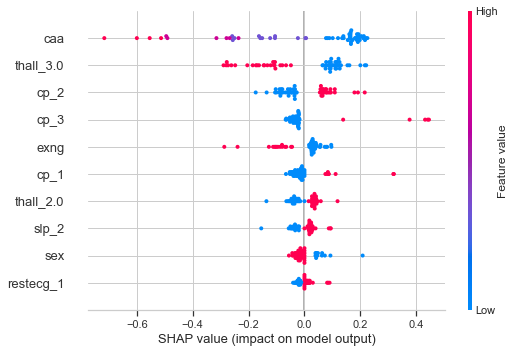

In [129]:
shap.summary_plot(shap_values,X_test, max_display = 10)

## Modellgüte bestimmen<a class="anchor" id="Kap6"></a>

Die geschätzten Modelle werden anhand von drei Gütemaßen miteinander verglichen:
   + Accuracy: Anteil korrekt prognistizierter Patienten
   + Precision: Anteil korrekt prognistizierter Patienten mit Herzkrankheit an allen Patienten, für die Herzkrankheit prognostiziert wurde (True Positives / (True Positives + False Positives)
   + Recall: Anteil der korrekt prognostizierten Patienten an allen Patienten mit Herzkrankheit (True Positives / (True Positives + False Negatives)

Funktion, die einige Gütemaße berechnet:

In [143]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def performance(y_test,y_fit):
    accuracy = accuracy_score(y_test, y_fit) * 100
    precision = precision_score(y_test, y_fit) * 100
    recall = recall_score(y_test, y_fit) * 100
    scores = [accuracy,precision,recall]
    
    return scores

Berechnung der Gütemaße für jedes Modell und anschließende Darstellung in einer Tabelle (1 = Modell mit fehlenden Werten; 2 = Modell mit imputierten Werten):

In [145]:
scores_lr1 = performance(y_test, y_fit_lr)

In [146]:
scores_lr2 = performance(y_test2, y_fit_lr2)

In [147]:
scores_svm1 = performance(y_test, y_fit_svm1)

In [148]:
scores_svm2 = performance(y_test2,y_fit_svm2)

In [149]:
scores_tree1 = performance(y_test,y_fit_dt)

In [159]:
scores_tree2 = performance(y_test2,y_fit_dt2)

In [225]:
scores_rf1 = performance(y_test,y_fit_rf1)

In [226]:
scores_rf2 = performance(y_test2,y_fit_rf2)

In [228]:
final = pd.DataFrame(list(zip(scores_lr1,scores_tree1, scores_rf1, scores_svm1)),
               columns =['LR', 'DT','RF','SVM'], index = ["Accuracy", "Precision", "Recall"])

In [229]:
final2 = pd.DataFrame(list(zip(scores_lr2, scores_tree2,scores_rf2,scores_svm2)),
               columns =['LR', 'DT', 'RF','SVM'], index = ["Accuracy", "Precision", "Recall"])

In [230]:
print("Modellgüte, Datensatz mit fehlenden Werten:")
print(final)

Modellgüte, Datensatz mit fehlenden Werten:
                  LR         DT         RF        SVM
Accuracy   74.137931  70.689655  75.862069  75.862069
Precision  78.787879  79.310345  83.333333  77.777778
Recall     76.470588  67.647059  73.529412  82.352941


In [231]:
print("Modellgüte, Datensatz mit imputierten Werten:")
print(final2)

Modellgüte, Datensatz mit imputierten Werten:
                  LR         DT         RF        SVM
Accuracy   73.770492  68.852459  75.409836  75.409836
Precision  77.142857  76.666667  79.411765  76.315789
Recall     77.142857  65.714286  77.142857  82.857143


Mit Ausnahme des Decision Trees schneiden alle Modelle in etwa gleich gut ab. Bei Random Forest und SVM sind die Unterschiede zwischen Precision und Recall größer als bei der logistischen Regression. Es macht kaum einen Unterschied, ob die fehlenden Werte imputiert wurden, oder ob Fälle mit fehlenden Werten von der Analyse ausgeschlossen wurden (dies kann durch die geringe Anzahl an Fällen mit fehlenden Werten erklärt werden).